In [204]:
from typing import List, Tuple
import torch
import matplotlib.pyplot as plt

In [317]:
import importlib
import main
importlib.reload(main)

<module 'main' from '/Users/ytakano/projects/dass2023/adv/main.py'>

In [352]:
%%time
x_true, x_free, x_filter, std_filter, x_smoother, std_smoother = main.run()

CPU times: user 20.3 s, sys: 1.05 s, total: 21.3 s
Wall time: 4.32 s


## フリーラン vs 真値
- 誤差(シェード)が下流側に移流している

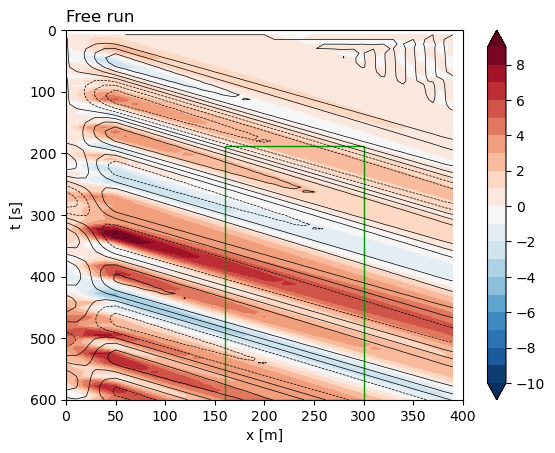

In [353]:
main.plot_xt(
    x_free - x_true, 
    torch.arange(-10, 10, 1),
    "RdBu_r",
    x_free, 
    torch.arange(-20, 20, 5),
    "Free run",
)

## EnKF vs 真値
- メンバ数100
- 同化領域(緑枠)の下流側で誤差が減少している
- 観測誤差はσ=8で、下流側の誤差の大きさはそれより小さい（4未満)
- 同化された下流側はスプレッドが2程度に減少

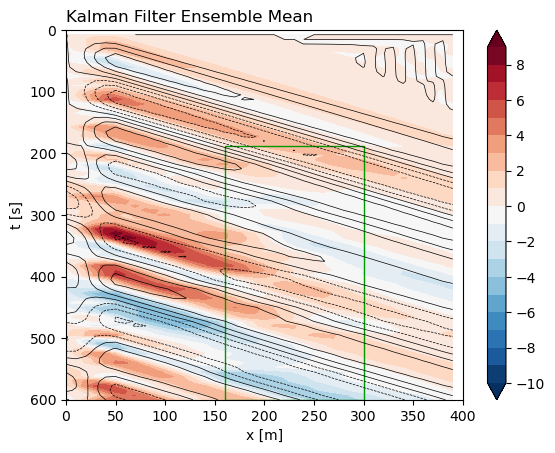

In [354]:
main.plot_xt(
    x_filter - x_true, 
    torch.arange(-10, 10, 1),
    "RdBu_r",
    x_filter,
    torch.arange(-20, 20, 5),
    "Kalman Filter Ensemble Mean"
)

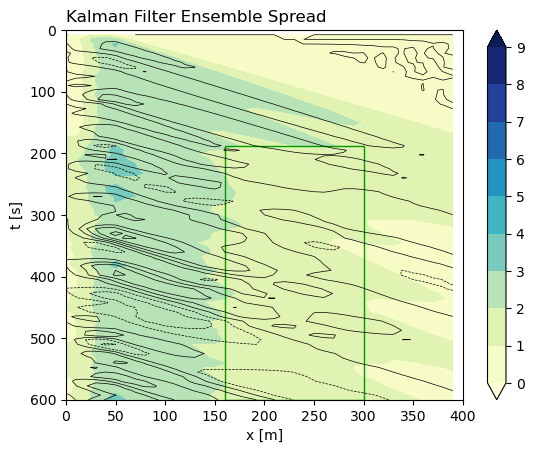

In [357]:
main.plot_xt(
    std_filter, 
    torch.arange(0, 10, 1),
    "YlGnBu",
    x_filter - x_true,
    torch.arange(-10, 10, 2),
    "Kalman Filter Ensemble Spread"
)

## 固定ラグ平滑化 vs 真値
- メンバ数100、ラグ300ステップ(150秒)
- 場が滑らかになった
- EnKFと比べて上流側の誤差も減少している
- 上流側のアンサンブルスプレッドも減少

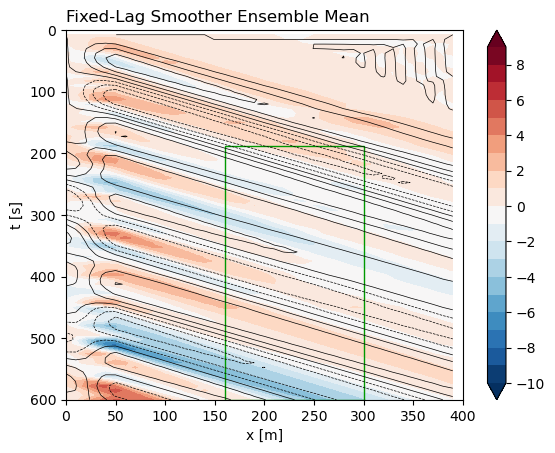

In [360]:
main.plot_xt(
    x_smoother - x_true, 
    torch.arange(-10, 10, 1),
    "RdBu_r",
    x_smoother,
    torch.arange(-20, 20, 5),
    "Fixed-Lag Smoother Ensemble Mean",
)

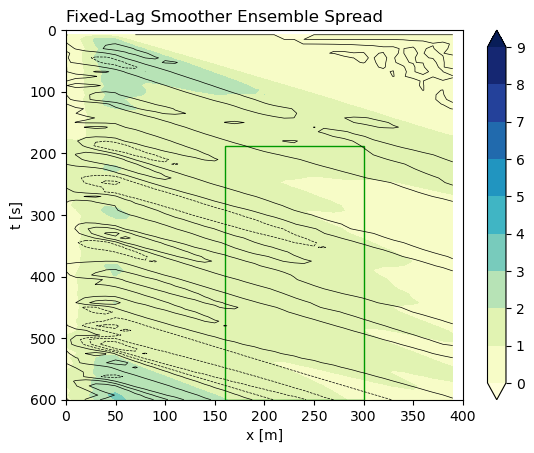

In [359]:
main.plot_xt(
    std_smoother, 
    torch.arange(0, 10, 1),
    "YlGnBu",
    x_smoother - x_true,
    torch.arange(-10, 10, 2),
    "Fixed-Lag Smoother Ensemble Spread"
)